In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename1="amsterdam_weekdays.csv"
filename2="amsterdam_weekends.csv"
df1=pd.read_csv(filename1)
df2=pd.read_csv(filename2)

In [3]:
print(df1.columns)
print(df2.columns)

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')
Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')


In [4]:
print(df2.head())


   Unnamed: 0      realSum        room_type  room_shared  room_private  \
0           0   319.640053     Private room        False          True   
1           1   347.995219     Private room        False          True   
2           2   482.975183     Private room        False          True   
3           3   485.552926     Private room        False          True   
4           4  2771.541724  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              2.0              False      0    1                 9.0   
1              2.0              False      0    1                 9.0   
2              4.0              False      0    1                 9.0   
3              2.0               True      0    0                10.0   
4              4.0               True      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        88.0         1

In [5]:
df1["is_weekend"]=False
df2["is_weekend"]=True
df=pd.concat([df1,df2],ignore_index=True)
print(df.head())
df.isnull().sum()

   Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      1    0                10.0  ...   
1              4.0              False      0    0                 8.0  ...   
2              2.0              False      0    1                 9.0  ...   
3              4.0              False      0    1                 9.0  ...   
4              2.0               True      0    0                10.0  ...   

   bedrooms      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0         1  5.022964    2.53938

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
is_weekend                    0
dtype: int64

In [6]:
df_shared=df[df["room_shared"]==True]
print(len(df_shared))

10


# Data Preprocessing
### Removal of Shared Rooms
Given the small proportion of shared rooms in the dataset (comprising only 10 instances), these entries will be excluded from the analysis to focus on more prevalent room types.

### Exclusion of Latitude and Longitude Features
The attributes for latitude (lat) and longitude (lng) will be omitted from the feature set, as they are not expected to be beneficial for the Neural Network model in the current scope of the analysis.

In [7]:
df=df[df["room_shared"]==False]
df=df.drop(["room_shared","lng","lat"],axis=1)
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_private', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm',
       'is_weekend'],
      dtype='object')
   Unnamed: 0     realSum     room_type  room_private  person_capacity  \
0           0  194.033698  Private room          True              2.0   
1           1  344.245776  Private room          True              4.0   
2           2  264.101422  Private room          True              2.0   
3           3  433.529398  Private room          True              4.0   
4           4  485.552926  Private room          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0 

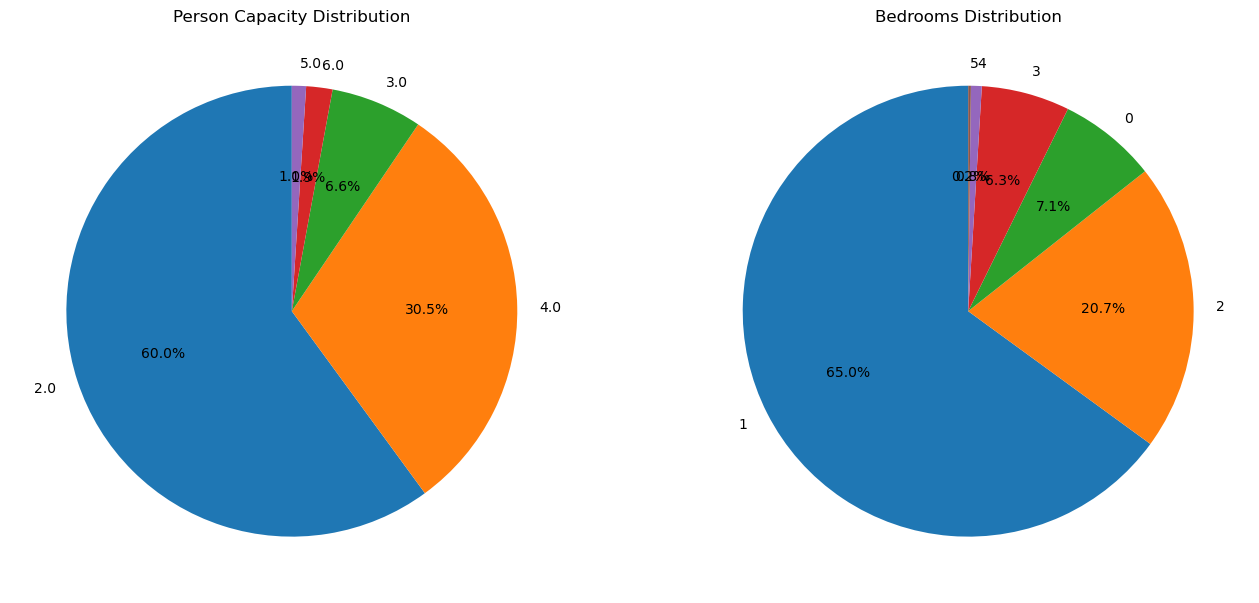

In [8]:
counts_person_capacity = df['person_capacity'].value_counts()
counts_bedrooms = df['bedrooms'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].pie(counts_person_capacity, labels=counts_person_capacity.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Person Capacity Distribution')

axes[1].pie(counts_bedrooms, labels=counts_bedrooms.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Bedrooms Distribution')

plt.show()

In data analysis, it's crucial to eliminate redundant or highly correlated variables that don't add much unique information to the analysis. Doing so simplifies the model and makes interpretation more straightforward. Given that the person_capacity and bedrooms columns are closely related, and that bedrooms is considered to be more rigid and reliable data, it's prudent to drop the person_capacity column from the DataFrame.

In [9]:
df.drop('person_capacity', axis=1, inplace=True)
print(df.head())

   Unnamed: 0     realSum     room_type  room_private  host_is_superhost  \
0           0  194.033698  Private room          True              False   
1           1  344.245776  Private room          True              False   
2           2  264.101422  Private room          True              False   
3           3  433.529398  Private room          True              False   
4           4  485.552926  Private room          True               True   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
0      1    0                10.0                        93.0         1   
1      0    0                 8.0                        85.0         1   
2      0    1                 9.0                        87.0         1   
3      0    1                 9.0                        90.0         2   
4      0    0                10.0                        98.0         1   

       dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0  5.022964    2.539380 

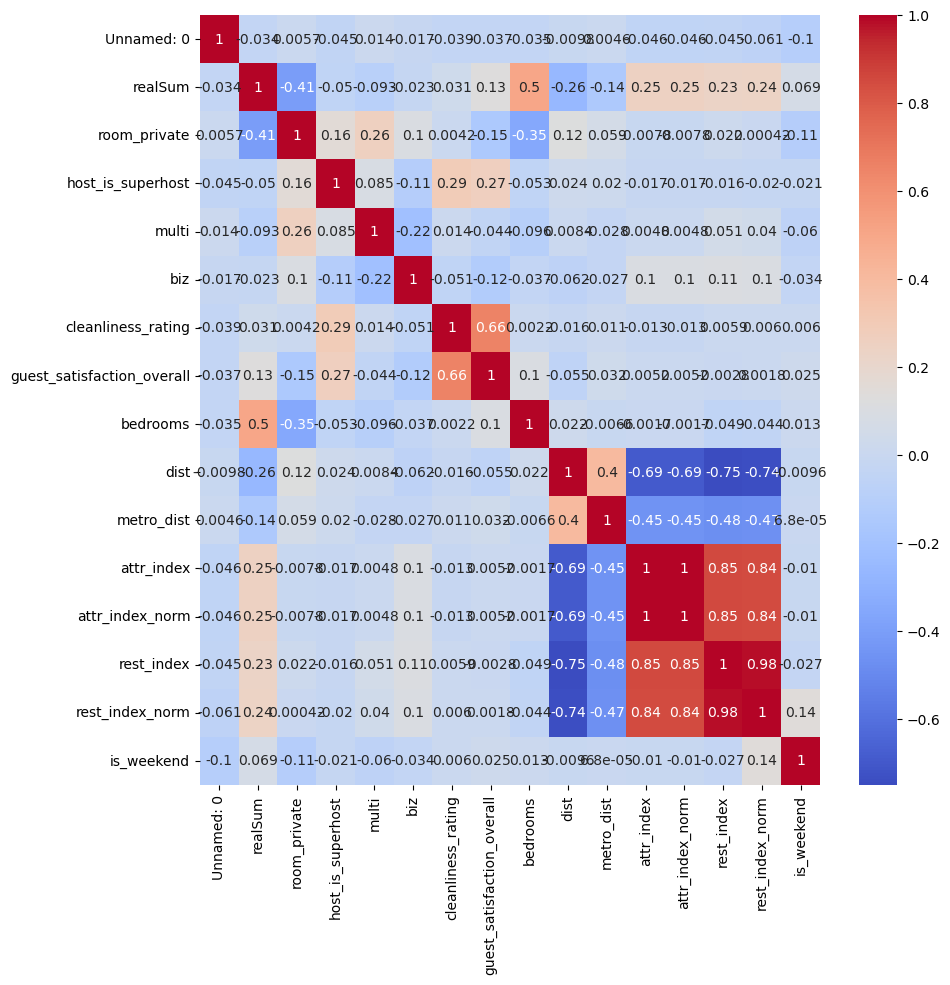

In [10]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

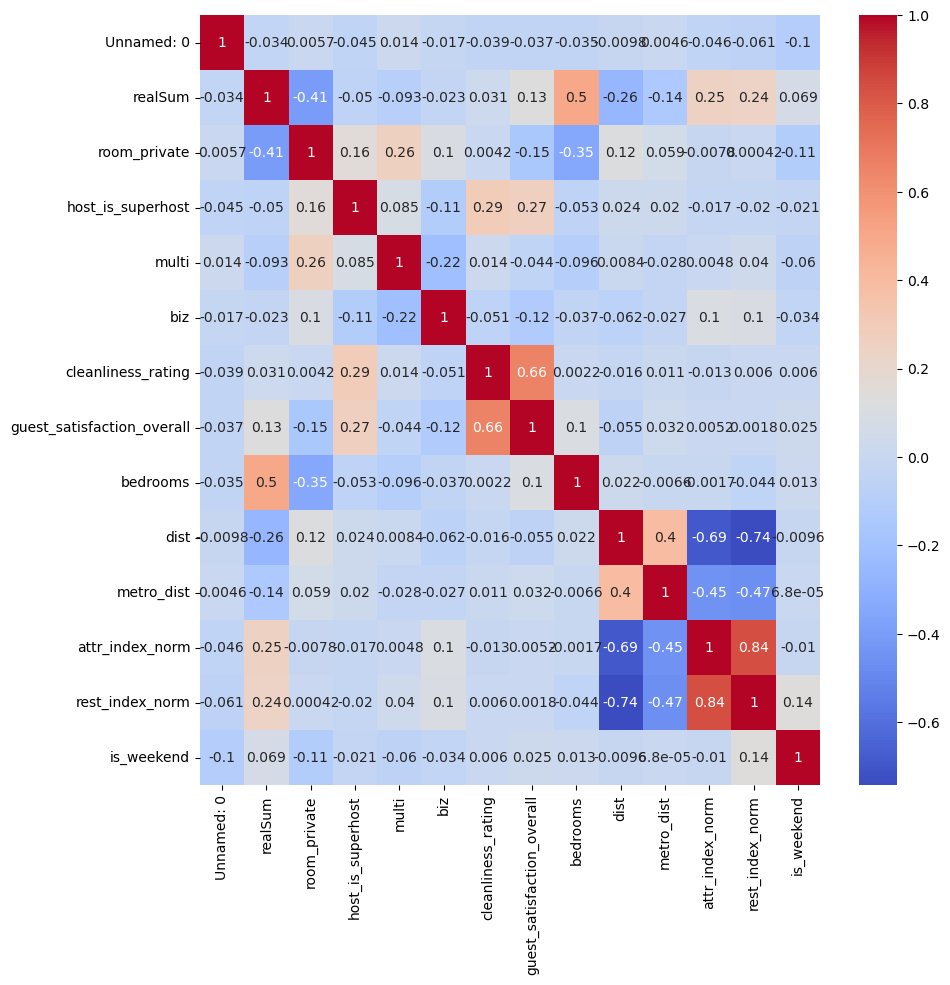

In [11]:
if 'rest_index' in df.columns and 'attr_index' in df.columns:
    df = df.drop(['rest_index', 'attr_index'], axis=1)

    
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Lets see how the plot looks for price (Realsum) and dist for 2 bedroom apartments

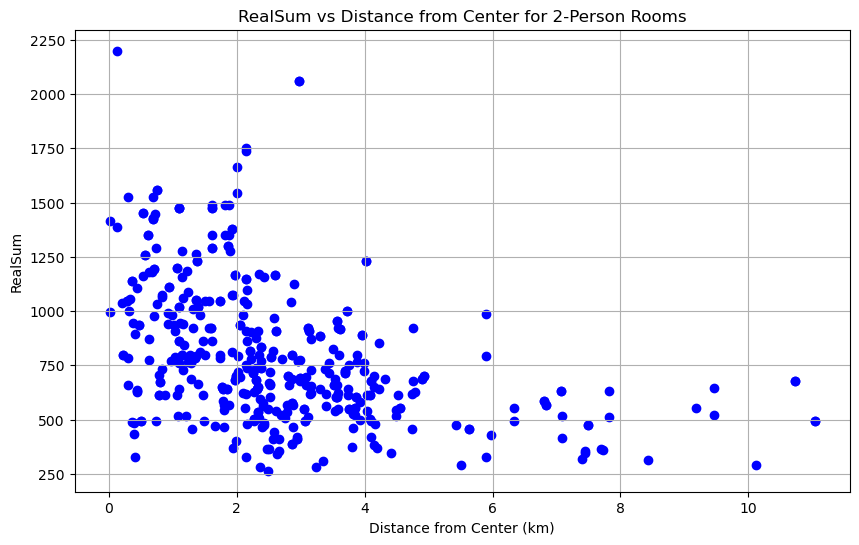

In [12]:
bedrooms2=df[df["bedrooms"]==2]
plt.figure(figsize=(10, 6))
plt.scatter(bedrooms2['dist'], bedrooms2['realSum'], c='blue')
plt.title('RealSum vs Distance from Center for 2-Person Rooms')
plt.xlabel('Distance from Center (km)')
plt.ylabel('RealSum')
plt.grid(True)
plt.show()

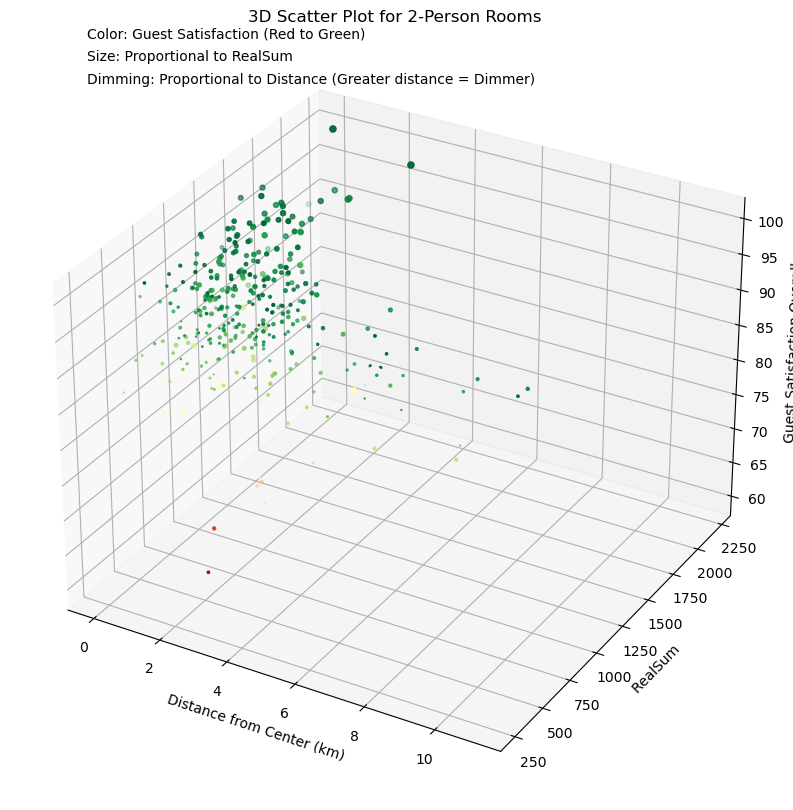

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.RdYlGn((bedrooms2['guest_satisfaction_overall'] - bedrooms2['guest_satisfaction_overall'].min()) / 
                       (bedrooms2['guest_satisfaction_overall'].max() - bedrooms2['guest_satisfaction_overall'].min()))


sizes = (bedrooms2['realSum'] - bedrooms2['realSum'].min()) / (bedrooms2['realSum'].max() - bedrooms2['realSum'].min()) * 20


alpha_values = 1.0 - (bedrooms2['dist'] - bedrooms2['dist'].min()) / (bedrooms2['dist'].max() - bedrooms2['dist'].min())


sc = ax.scatter(bedrooms2['dist'], bedrooms2['realSum'], bedrooms2['guest_satisfaction_overall'], 
                c=colors, s=sizes, alpha=alpha_values, depthshade=False)

ax.text2D(0.1, 0.99, "Color: Guest Satisfaction (Red to Green)", transform=ax.transAxes)
ax.text2D(0.1, 0.96, "Size: Proportional to RealSum", transform=ax.transAxes)
ax.text2D(0.1, 0.93, "Dimming: Proportional to Distance (Greater distance = Dimmer)", transform=ax.transAxes)
ax.set_title('3D Scatter Plot for 2-Person Rooms')
ax.set_xlabel('Distance from Center (km)')
ax.set_ylabel('RealSum ')
ax.set_zlabel('Guest Satisfaction Overall')

plt.show()

In [14]:
print(df.columns)

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_private',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index_norm', 'rest_index_norm', 'is_weekend'],
      dtype='object')


In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)

df.rename(columns={'realSum': 'price'}, inplace=True)

boolean_columns = ['room_private', 'host_is_superhost', 'biz',"is_weekend","multi"]
for col in boolean_columns:
    df[col] = df[col].astype(int)


categorical_columns = ['room_type']
for col in categorical_columns:
    df[col] = pd.Categorical(df[col]).codes * 100

print(df)

            price  room_type  room_private  host_is_superhost  multi  biz  \
0      194.033698        100             1                  0      1    0   
1      344.245776        100             1                  0      0    0   
2      264.101422        100             1                  0      0    1   
3      433.529398        100             1                  0      0    1   
4      485.552926        100             1                  1      0    0   
...           ...        ...           ...                ...    ...  ...   
2075   473.132894          0             0                  0      0    0   
2076   491.645771          0             0                  0      0    0   
2077  1812.855904          0             0                  0      0    0   
2078   399.315727          0             0                  0      0    0   
2079   728.798069          0             0                  1      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \

Epoch 1/10
46/46 [==============================] - 1s 1ms/step - loss: 554775.4375
Epoch 2/10
46/46 [==============================] - 0s 1ms/step - loss: 513608.8438
Epoch 3/10
46/46 [==============================] - 0s 747us/step - loss: 362279.3438
Epoch 4/10
46/46 [==============================] - 0s 1ms/step - loss: 181962.5938
Epoch 5/10
46/46 [==============================] - 0s 1ms/step - loss: 147329.1562
Epoch 6/10
46/46 [==============================] - 0s 1ms/step - loss: 140231.6719
Epoch 7/10
46/46 [==============================] - 0s 956us/step - loss: 136305.8594
Epoch 8/10
46/46 [==============================] - 0s 894us/step - loss: 133735.4531
Epoch 9/10
46/46 [==============================] - 0s 750us/step - loss: 132356.0781
Epoch 10/10
20/20 [==============================] - 0s 973us/step - loss: 55107.2188
Test Loss: 55107.21875
20/20 [==============================] - 0s 335us/step
Epoch 1/10
37/37 [==============================] - 0s 2ms/step - loss: 

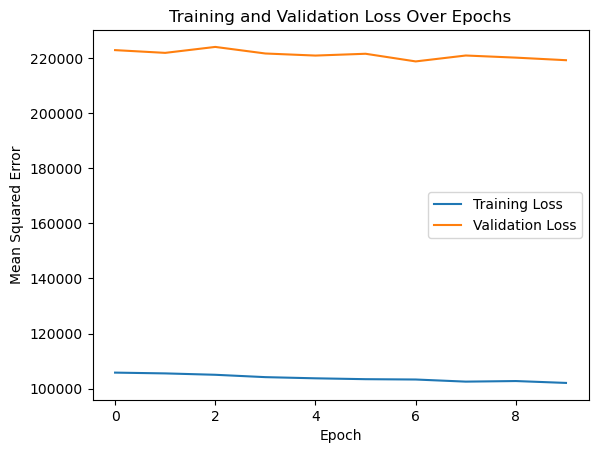

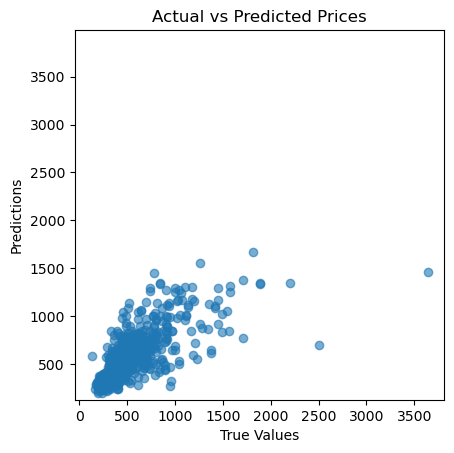

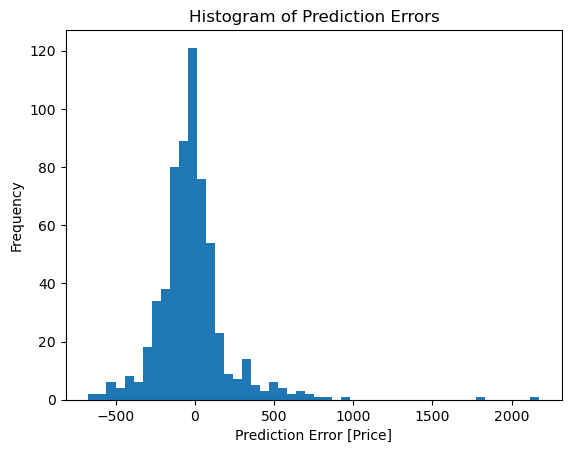

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
X = df.drop('price', axis=1).values
y = df['price'].values


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1)
])


model.compile(optimizer='adam',
              loss='mean_squared_error')


model.fit(X_train, y_train, epochs=10, batch_size=32)


loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


predictions = model.predict(X_test)


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


predictions = model.predict(X_test)


plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


plt.figure()
plt.scatter(y_test, predictions.flatten(), alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.title('Actual vs Predicted Prices')
plt.show()


plt.figure()
plt.hist(y_test - predictions.flatten(), bins=50)
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error [Price]')
plt.ylabel('Frequency')
plt.show()